In [ ]:
import os
import torch
import torch.nn as nn
import numpy as np
import time
import random
import math
import copy
from matplotlib import pyplot as plt


In [ ]:
sparsity = [0, 33, 40, 60, 74, 85, 97]
# power = [0.2108, 0.2125, 0.2130, 0.2157, 0.2254, 0.228, 0.2295] # origin
power = [0.2895, 0.2613, 0.2530, 0.2350, 0.2254, 0.2225, 0.2208]
color = (255/255, 0, 0)
plt.plot(sparsity, power, 'x-', marker='s', color=color,  linewidth=2, markersize=8, label='energy efficiency')

plt.grid(True)

coeff = polyfit(sparsity, power, 3)
f = poly1d(coeff)
# plt.plot(sparsity, f(sparsity), 'x-', marker='^',  linewidth=2, markersize=8)
from numpy import random
print(f((96*97)**0.5)+random.normal(0.0005, 0.001))
print("coeff: {}".format(coeff))
plt.show()



In [ ]:
ultilization = [0.508, 0.381, 0.35, 0.26, 0.202, 0.168, 0.0074]
plt.plot(sparsity, ultilization, 'x-', marker='*', color='green',  linewidth=2, markersize=8, label='energy efficiency')
fetch_sparsity = 100- 9.2
fetch_energy = np.interp(fetch_sparsity, sparsity, ultilization)
print(fetch_energy)
plt.plot(fetch_sparsity, fetch_energy, 'r*')
plt.xlabel('Sparsity (%)', size=12)
plt.ylabel('Ultilization ', size=12)
plt.grid(True)
plt.show()

In [ ]:
# -*- coding: utf-8 -*- 
import  xdrlib ,sys
import xlrd
def open_excel(file= '../source/paper_JSSC.xls'):
    try:
        data = xlrd.open_workbook(file)
        return data
    except: # Exception,e:
        print("read error ")
        
def excel_table_byindex(file= 'file.xls',colnameindex=0,by_index=0, nrows = 1):
    data = open_excel(file)
    table = data.sheets()[by_index]
#     nrows = table.nrows #ÐÐÊý
    ncols = table.ncols #ÁÐÊý
    colnames =  table.row_values(colnameindex) #Ä³Ò»ÐÐÊý¾Ý 
    list =[]
    for rownum in range(1,nrows):

         row = table.row_values(rownum)
         if row:
             app = {}
             for i in range(len(colnames)):
                app[colnames[i]] = row[i] 
             list.append(app)
    return list

voltage =[]
frequency =[]
power =[]
tables = excel_table_byindex(file='/workspace/Sagitta_Fig/source/Paper_JSSC.xls',by_index=4, nrows =19)
for row in tables:
   print(row)
   voltage.append(row['Voltage-Frequency Scaling'])
   frequency.append(row['Clock Frequency(MHz)'])
   power.append(row['Power(mW)'])



In [ ]:

cls_plt_fig('').func_plt_fig({   "x_name":"Voltage", 
            "x_value": voltage, 
            "x_label" : r"$\bf{Voltage}$"+' ' + r"$\bf{(V)}$",
            "y1_fig_type": "plot",
            "y1_name":["Frequency"],
            "y1_value":[frequency], 
            "y1_color":[(0, 0, 0),],
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Frequency}$"+' ' + r"$\bf{(MHz)}$",
            "y1_marker":['s'],
            "y1_legend": [r"$\bf{Frequency}$"],
            "y1_yticks_max": 180,
            "y2_fig_type": "plot",
            "y2_name":"Power",
            "y2_value":power,
            "y2_color":(1, 0, 0),
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Power}$"+' ' + r"$\bf{(W)}$",
            "y2_marker":'^',
            "y2_legend": r"$\bf{Power}$",
            "y2_yticks_max": 0.9,
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "legend_loc": (0.01, 0.8),
            "grid_axis": 'x',
            "bar_width": 0.01,
            # "xticks": False,
            "figsize" : (7, 4.6),
            "fig_name" :'../../generate/Voltage-Frequency-Scaling.svg'
})

In [ ]:
y1_legend = ["Frequency"]
y1_value = [frequency]
y1_label = r"$\bf{Frequency}$"+' ' + r"$\bf{(MHz)}$"
y1_marker = ['s']
y2_value = power
y2_label = r"$\bf{Power}$"+' ' + r"$\bf{(W)}$"
y2_legend = "Power"

legend_loc = (0.05, 0.8)
y1_color = (0/255, 153/255, 255/255)
y2_color = (255/255, 100/255, 100/255)
y1_axis_color = (0/255, 153/255, 255/255)
y2_axis_color = (230/255, 57/255, 26/255)
cls_plt_fig('').func_plt_fig({   "x_name":"Conv Layers", 
            "x_value": voltage, 
            "x_label" : r"$\bf{Voltage}$"+' ' + r"$\bf{(V)}$",
            "x_axis_min": 0.65,
            "x_axis_max": 1.25,
            "y1_fig_type": "plot",
            "y1_name":y1_legend,
            "y1_value":y1_value, 
            "y1_color":[y1_color],
            "y1_linestyle":'x-',
            "y1_label":y1_label,
            "y1_marker":y1_marker,
            "y1_markerfacecolor": "white",
            "y1_markeredgewidth": 2,
            "y1_legend": y1_legend,
            "y1_yticks_max":200,
            "y1_yticks_min":0,
            "y1_axis_color": y1_axis_color,

            "y2_fig_type": "plot",
            "y2_name":"Sparsity",
            "y2_value":y2_value,
            "y2_color":y2_color,
            "y2_linestyle":'--',
            "y2_label":y2_label,
            "y2_marker":'o',
            "y2_markerfacecolor": "white",
            "y2_markeredgewidth": 2,
            "y2_legend": y2_legend,
            "y2_yticks_max": 0.8,
            "y2_yticks_min": 0,
            "y2_axis_color": y2_axis_color,

            "len_yticks": 5,
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": 0.4,
            # "xticks": threshold,
            'xticks_fontsize': 10,
            # "plt_text": False,
            "legend_loc": legend_loc,
            'figsize':(7, 3.5),
            'grid': 'both',
            "fig_name" :'../../generate/Voltage-Frequency-Scaling.svg'
            # 
})

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
class cls_plt_fig():
    def __init__(self, name):
        self.name = name
    def func_plt_fig(self, fig_dict={   "x_name":"Conv Layers", 
            "x_value": np.arange(3), 
            "x_label" : r"$\bf{Conv}$"+' ' +r"$\bf{Layers}$",
            "y1_fig_type": "bar",
            "y1_name":"speedup",
            "y1_value":[1], 
            "y1_color":(0, 0, 0),
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Speedup}$",
            "y1_marker":'s',
            "y1_legend": r"$\bf{Speedup}$",
            "y1_yticks_max": 18,
            "y2_fig_type": "bar",
            "y2_name":"energy_efficiency",
            "y2_value":[1],
            "y2_color":(1, 0, 0),
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$"+' ' + r"$\bf{(TOPS/W)}$",
            "y2_marker":'^',
            "y2_legend": r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$",
            "y2_yticks_max": 12,
            "grid_axis": 'both',
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": 0.4,
            "xticks": "layer",
            "plt_text": True,
            "legend_loc": (0.65, 0.8),
            "fig_name" :'../../generate/speedup&EE_layer.svg'
            }): # dict
        fig, ax = plt.subplots(figsize=fig_dict["figsize"] if "figsize" in fig_dict else (7, 4.6))
        color = fig_dict["y1_color"]
        family = fig_dict["family"]
        label_size = fig_dict["label_size"]
        if 'grid' in fig_dict:
            plt.grid(axis=fig_dict['grid'], zorder=0) #, 
        for idx_y in range(len(fig_dict["y1_name"])):
            if fig_dict['y1_fig_type'] == 'plot':
                ax.plot(fig_dict["x_value"], fig_dict["y1_value"][idx_y], fig_dict["y1_linestyle"], marker=fig_dict["y1_marker"][idx_y], color=color[idx_y],  linewidth=fig_dict["linewidth"], markersize=fig_dict["markersize"], label=fig_dict["y1_legend"][idx_y], zorder=10, markerfacecolor= fig_dict["y1_markerfacecolor"] if "y1_markerfacecolor" in fig_dict else None, markeredgewidth = fig_dict["y1_markeredgewidth"] if "y1_markeredgewidth" in fig_dict else None)
            elif fig_dict['y1_fig_type'] == 'bar':
                ax.bar(fig_dict["x_value"] - fig_dict['bar_width']/2 - fig_dict["bar_gap_width"]/2 if "bar_gap_width" in fig_dict else 0, fig_dict["y1_value"][idx_y], width=fig_dict['bar_width'], linewidth=fig_dict["linewidth"],label=fig_dict["y1_legend"][idx_y],facecolor= fig_dict["y1_facecolor"][idx_y] if "y1_facecolor" in fig_dict else color[idx_y],edgecolor= fig_dict["y1_edgecolor"][idx_y] if "y1_edgecolor" in fig_dict else None, hatch = fig_dict['y1_hatch'][idx_y] if 'y1_hatch' in fig_dict else None, zorder=10)
            else:
                print("Key Error 'fig_type'")
                os.exit()

        ax.set_xlabel(fig_dict["x_label"], size=label_size, family=family)
        ax.set_ylabel(fig_dict["y1_label"], size=label_size, color=color if 'y1_axis_color' not in fig_dict else fig_dict['y1_axis_color'], family=family)
        
        from matplotlib.pyplot import MultipleLocator
        inst = plt.gca()
        handles1, labels1 = ax.get_legend_handles_labels()
        len_yticks = len(ax.get_yticks()) if 'len_yticks' not in fig_dict else fig_dict['len_yticks']
        ax.set_yticks(np.linspace(0 if 'y1_yticks_min' not in fig_dict else fig_dict['y1_yticks_min'], fig_dict['y1_yticks_max'], len_yticks)) # occupy fully yaxis
        ax.set_ylim(0 if 'y1_yticks_min' not in fig_dict else fig_dict['y1_yticks_min'],)
        if fig_dict['y1_fig_type'] == 'bar':
            ax.set_xlim(fig_dict['x_value'][0]-fig_dict['bar_width']*2, fig_dict['x_value'][-1]+fig_dict['bar_width']*2)
        elif 'x_axis_max' in fig_dict and 'x_axis_min' in fig_dict:
            ax.set_xlim(fig_dict['x_axis_min'], fig_dict['x_axis_max'])
        if "y2_name" in fig_dict:
            ax1 = ax.twinx()
            color1 = fig_dict["y2_color"]

            if fig_dict['y2_fig_type'] == 'plot':
                ax1.plot(fig_dict["x_value"], fig_dict["y2_value"], fig_dict["y2_linestyle"], marker=fig_dict["y2_marker"], color=color1,  linewidth=fig_dict["linewidth"], markersize=fig_dict["markersize"], label=fig_dict["y2_legend"], zorder=10,markerfacecolor= fig_dict["y2_markerfacecolor"] if "y2_markerfacecolor" in fig_dict else None, markeredgewidth = fig_dict["y2_markeredgewidth"] if "y2_markeredgewidth" in fig_dict else None)
            elif fig_dict['y2_fig_type'] == 'bar':
                ax1.bar((np.array(fig_dict["x_value"])+fig_dict['bar_width'] if fig_dict['y1_fig_type'] == 'bar'else 0 )- fig_dict['bar_width']/2 + fig_dict["bar_gap_width"]/2 if "bar_gap_width" in fig_dict else 0, fig_dict["y2_value"],width=fig_dict['bar_width'], linewidth=fig_dict["linewidth"],label=fig_dict["y2_legend"], facecolor= fig_dict["y2_facecolor"] if "y2_facecolor" in fig_dict else color1,edgecolor= fig_dict["y2_edgecolor"] if "y2_edgecolor" in fig_dict else None, hatch = fig_dict['y2_hatch'] if 'y2_hatch' in fig_dict else None, zorder=10)
            else:
                print("Key Error 'fig_type'")
                os.exit()  

            ax1.set_ylabel(fig_dict["y2_label"], size=label_size, color=color1 if 'y2_axis_color' not in fig_dict else fig_dict['y2_axis_color'], family=family)

            handles2, labels2 = ax1.get_legend_handles_labels()
            plt.legend(handles1+handles2, labels1+labels2, loc=fig_dict['legend_loc'])
            ax1.spines['right'].set_color(color1 if 'y2_axis_color' not in fig_dict else fig_dict['y2_axis_color'])
            ax1.tick_params(axis='y', colors=color1 if 'y2_axis_color' not in fig_dict else fig_dict['y2_axis_color'])

            ax1.set_yticks(np.linspace(0 if 'y2_yticks_min' not in fig_dict else fig_dict['y2_yticks_min'], fig_dict['y2_yticks_max'], len_yticks)) # same number of yticks with ax
            ax1.set_ylim(0 if 'y2_yticks_min' not in fig_dict else fig_dict['y2_yticks_min'], fig_dict['y2_yticks_max'])
            ax1.spines['top'].set_visible(False)
            ax1.spines['left'].set_visible(False)
        else:
            plt.legend(handles1, labels1, loc=fig_dict['legend_loc'])
        if 'xticks' in fig_dict:
            plt.xticks(fig_dict['x_value'], fig_dict['xticks'], size=fig_dict['xticks_fontsize'])
            if 'rotation' in fig_dict and fig_dict['rotation'] != 0:
                fig.autofmt_xdate(rotation=fig_dict['rotation'])
            ax.tick_params(axis = 'x', labelsize = fig_dict['xticks_fontsize'])
        if "plt_text" in fig_dict:
            for x in range(len(fig_dict['x_value'])):
                for idx_y in range(len(fig_dict["y1_name"])):
                    if fig_dict['y1_value'][idx_y][x] > 0:
                        ax.text(fig_dict['x_value'][x]-fig_dict['bar_width']/2 - (fig_dict["bar_gap_width"]/2 if "bar_gap_width" in fig_dict else 0), fig_dict['y1_value'][idx_y][x]+0.05*ax.get_yticks()[-1],'%.1f' %fig_dict['y1_value'][idx_y][x],va='top', ha='center', fontsize=label_size)
                if fig_dict['y2_value'][x]> 0:
                    ax1.text(fig_dict['x_value'][x]+fig_dict['bar_width']/2 + fig_dict["bar_gap_width"]/2 if "bar_gap_width" in fig_dict else 0, fig_dict['y2_value'][x]+0.05*ax1.get_yticks()[-1],'%.1f' %fig_dict['y2_value'][x],va='top', ha='center', fontsize=label_size)
        ax.spines['left'].set_color((0,0,0) if 'y1_axis_color' not in fig_dict else fig_dict['y1_axis_color'])
        ax.tick_params(axis='y', colors=(0,0,0) if 'y1_axis_color' not in fig_dict else fig_dict['y1_axis_color'])
        
        plt.savefig(fig_dict['fig_name'], format='svg')
        plt.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
class MyAxes3D(axes3d.Axes3D):

    def __init__(self, baseObject, sides_to_draw):
        self.__class__ = type(baseObject.__class__.__name__,
                              (self.__class__, baseObject.__class__),
                              {})
        self.__dict__ = baseObject.__dict__
        self.sides_to_draw = list(sides_to_draw)
        self.mouse_init()

    def set_some_features_visibility(self, visible):
        for t in self.w_zaxis.get_ticklines() + self.w_zaxis.get_ticklabels():
            t.set_visible(visible)
        self.w_zaxis.line.set_visible(visible)
        self.w_zaxis.pane.set_visible(visible)
        self.w_zaxis.label.set_visible(visible)

    def draw(self, renderer):
        # set visibility of some features False 
        self.set_some_features_visibility(False)
        # draw the axes
        super(MyAxes3D, self).draw(renderer)
        # set visibility of some features True. 
        # This could be adapted to set your features to desired visibility, 
        # e.g. storing the previous values and restoring the values
        self.set_some_features_visibility(True)

        zaxis = self.zaxis
        draw_grid_old = zaxis.axes._draw_grid
# disable draw grid
        zaxis.axes._draw_grid = False

        tmp_planes = zaxis._PLANES

        if 'l' in self.sides_to_draw :
            # draw zaxis on the left side
            zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
                             tmp_planes[0], tmp_planes[1],
                             tmp_planes[4], tmp_planes[5])
            zaxis.draw(renderer)
        if 'r' in self.sides_to_draw :
            # draw zaxis on the right side
            zaxis._PLANES = (tmp_planes[3], tmp_planes[2], 
                             tmp_planes[1], tmp_planes[0], 
                             tmp_planes[4], tmp_planes[5])
            zaxis.draw(renderer)

        zaxis._PLANES = tmp_planes

        # disable draw grid
        zaxis.axes._draw_grid = draw_grid_old

In [ ]:
# ÔØÈëÄ£¿é
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
# import seaborn as sns
from scipy import interpolate

#Éú³ÉÊý¾Ý
# x = np.linspace(0.1,0.9,4)
x = np.array([1, 2, 3, 4])
# y = np.linspace(0.1,0.9,4)
y = np.array([88, 89, 96.5, 98])
# z = np.random.rand(16)
accuracy = np.array([0.958, 0.954, 0.950, 
     0.952, 0.954, 0.952,
     0.948, 0.935, 0.908,
0.958, 0.954, 0.950, 
     0.952, 0.954, 0.952,
     0.948     
    ])
# z = np.zeros(16)
# for i in range(16):
#     z[i] = 0.961 - accuracy[i]
z = 0.961 - accuracy
print(z)
#²åÖµ
# xx, yy = np.meshgrid(x, y)

f = interpolate.interp2d(x, y, z, kind='cubic')
xnew = np.linspace(1,4,5)
ynew = np.linspace(88,98,5)
znew = f(xnew, ynew)

#ÐÞ¸Äx,y£¬zÊäÈë»­Í¼º¯ÊýÇ°µÄshape
xx1, yy1 = np.meshgrid(xnew, ynew)
newshape = (xx1.shape[0])*(xx1.shape[0])
y_input = xx1.reshape(newshape)
x_input = yy1.reshape(newshape)
z_input = znew.reshape(newshape)

#»­Í¼
# sns.set(style='white')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = fig.add_axes(MyAxes3D(ax, 'l'))
ax.plot_trisurf(x_input,y_input,z_input,cmap=cm.coolwarm)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.savefig('../../generate/threshold-sparsity-accuracy.svg', format='svg')
plt.show()


In [ ]:
# c3d
# con_layer = ['Conv1', 'Conv2', 'Conv3', 'Conv4','Conv5','Conv6','Conv7', 'Conv8']
con_layer = ['Conv1', 'Conv2', 'Conv3', 'Conv4','Conv5','Conv6','Conv7', 'Conv8']
energy_efficiency = np.array([0.353, 5.9, 5.3, 5.1, 4.8, 4.9, 1.38, 1.154])
speedup = [
3.359523941,
28.36806079,
25.33799735,
21.52732095,
21.10512515,
18.52442435,
5.098949274,
3.908653758
]
power = np.array([0.2213, 0.2212 ,0.2210 ,0.2209 ,0.2208 ,0.2208 ,0.2210 ,0.2208 ])
bar_width = 0.4
y2_yticks_max = 12
y1_yticks_max = 30
legend_loc = (0.65, 0.8)
fig_name = '../../generate/speedup&EE_layer_of_C3D.svg'

# 3dunet
# con_layer = [
# 'Conv1',
# 'Conv2',
# 'Conv3',
# 'Conv4',
# 'Conv5',
# 'Conv6',
# 'Conv7',
# 'Conv8',
# 'Conv9',
# 'Conv10',
# 'Conv11',
# 'Conv12',
# 'Conv13',
# 'Conv14',
# 'Conv15',
# 'Conv16',
# 'Conv17',
# 'Conv18',
# 'Conv19',
# 'Conv20',
# 'Conv21',
# 'Conv22',
# 'Conv23',
# 'Conv24',
# 'Conv25',
# 'Conv26',
# 'Conv27',
# 'Conv28',
# 'Conv29',
# 'Conv30'

# ]
# energy_efficiency = np.array([
# 0.233286122,
# 4.435876361,
# 6.03772006,
# 6.371646318,
# 5.980497309,
# 6.240827834,
# 6.450648274,
# 6.371646318,
# 6.202671446,
# 6.166550284,
# 6.480048242,
# 6.371646318,
# 6.281370301,
# 6.281370301,
# 6.422937532,
# 1.57566893,
# 1.546093755,
# 1.592911579,
# 1.524844811,
# 1.516984233,
# 1.440326527,
# 5.926945078,
# 6.067936931,
# 5.876495005,
# 6.281370301,
# 5.876495005,
# 6.422937532,
# 5.337780384,
# 6.545353822,
# 6.422937532

# ])
# power = np.array([
# 0.2231, 
# 0.2208, 
# 0.2213, 
# 0.2215, 
# 0.2213, 
# 0.2214, 
# 0.2215, 
# 0.2215, 
# 0.2214, 
# 0.2214, 
# 0.2216, 
# 0.2215, 
# 0.2214, 
# 0.2214, 
# 0.2215, 
# 0.2215, 
# 0.2214, 
# 0.2215, 
# 0.2213, 
# 0.2213, 
# 0.2212, 
# 0.2212, 
# 0.2213, 
# 0.2212, 
# 0.2214, 
# 0.2212, 
# 0.2215, 
# 0.2210, 
# 0.2216, 
# 0.2215 

#  ])
# 3dunet
# con_layer = [
# 'Layer1',
# 'Layer2',
# 'Layer3',
# 'Layer4',
# 'Layer5',
# 'Layer6',
# 'Layer7',
# 'Layer8',
# 'Layer9',
# 'Layer10'
# ]

# energy_efficiency = np.array([
# 5.4,
# 6.2,
# 6.2,
# 5.1,
# 1.5,
# 3.6,
# 6,
# 6.3,
# 5.9,
# 6.5

# ])
# power = np.array([
# 0.2231, 
# 0.2208, 
# 0.2213, 
# 0.2215, 
# 0.2213, 
# 0.2214, 
# 0.2215, 
# 0.2215, 
# 0.2214, 
# 0.2214
#  ])


# bar_width = 0.4
# xticks_fontsize = 8
# y2_yticks_max = 12
# y1_yticks_max = 30
# legend_loc = (0.25, 0.81)
# fig_name = '../../generate/speedup&EE_layer_of_3DUent.svg'


speedup = energy_efficiency*power/(0.175*0.2895)
y1_color = (128/255, 216/255, 248/255)
y2_color = (255/255, 177/255, 177/255)

y1_axis_color = (0/255, 153/255, 255/255)
y2_axis_color = (230/255, 57/255, 26/255)
# for x in range(len(technique)):
#     plt.text(x-0.15,energy_efficiency[x]+0.5,'%s' %round(energy_efficiency[x],2),va='center')
sys.path.append("../")
# import plt_fig
cls_plt_fig('').func_plt_fig({   "x_name":"Conv Layers", 
            "x_value": np.arange(len(con_layer)), 
            "x_label" : r"$\bf{Conv}$"+' ' +r"$\bf{Layers}$",
            "y1_fig_type": "bar",
            "y1_name":"speedup",
            "y1_value":speedup, 
            "y1_color":y1_color,
            "y1_axis_color":y1_axis_color,
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Speedup}$",
            "y1_marker":'s',
            "y1_legend": r"$\bf{Speedup}$",
            "y1_yticks_max":y1_yticks_max,
            "y2_fig_type": "bar",
            "y2_name":"energy_efficiency",
            "y2_value":energy_efficiency,
            "y2_color":y2_color,
            "y2_axis_color":y2_axis_color,
            "y2_linestyle":'--',
            "y2_label":r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$"+' ' + r"$\bf{(TOPS/W)}$",
            "y2_marker":'^',
            "y2_legend": r"$\bf{Energy}$" + ' ' + r"$\bf{efficiency}$",
            "y2_yticks_max": y2_yticks_max,
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": bar_width,
            "xticks": con_layer,
            'xticks_fontsize': xticks_fontsize,
            # "plt_text": False,
            "legend_loc": legend_loc,
            "fig_name" :fig_name
})

******** test import 
color: [(0.0, 0.6784313725490196, 0.7294117647058823), (0.2196078431372549, 0.7607843137254902, 0.36470588235294116), (0.3764705882352941, 0.615686274509804, 0.792156862745098)]
idx_y: 0


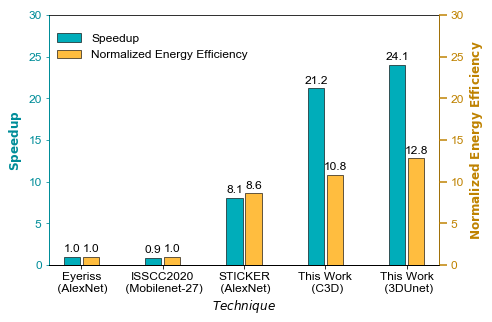

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from cls_plt_fig import cls_plt_fig

# #####################################################################
# # Comparison with Technique

# y2_yticks_max = 25
# x_label = r"$\bf{Technique}$"

# figsize = (3.5, 3.5)

# # # c3d
# # # speedup = np.array([0.22, 1 ,3.2, 4.61])/0.22 
# # # energy_efficiency = np.array([0.175, 1 ,3.2, 4.21])

# speedup_c3d = np.array([1, 6.48, 9.07,  17.2]) # 1 x6.48x 1.4x 1.9  = 17.2
# power_factor = np.array([5.71, 4.6, 5.3, 4.5 ])
# energy_efficiency_c3d = np.delete(speedup_c3d / power_factor, 1) # np.array([0.175   3.59])

# # fig_name ='../../generate/technique_c3d.svg'

# # # 3dunet
# speedup_3dunet = np.array([1, 10.49, 13.64,  19.5]) # 1 x10.49x 1.3x 1.43  = 19.5
# power_factor = np.array([5.71, 4.4, 4.82, 4.3 ])
# energy_efficiency_3dunet = np.delete(speedup_3dunet / power_factor, 1) #0.175,..., 4.65

# # fig_name ='../../generate/technique_speedup.svg'
# # technique = ['Baseline', 'FFZS', 'FFZS\n+HLB', 'FFZS+HLB\n+TDVD']
# # x_value = np.arange(len(technique))
# # xticks = technique
# # y1_value = [speedup_c3d, speedup_3dunet]
# # y1_yticks_max = 25
# # len_yticks = 6
# # y1_label = r"$\bf{Speedup}$"

# fig_name ='../../generate/technique_energy-efficiency.svg'
# technique = ['Baseline', 'FFZS+HLB', 'FFZS+HLB\n+TDVD']
# x_value = np.arange(len(technique))
# xticks = technique
# y1_value = [energy_efficiency_c3d, energy_efficiency_3dunet]
# y1_yticks_max = 5
# len_yticks = 6
# y1_label = r"$\bf{Energy\ Efficiency\ (TOPS/W)}$"

# y1_name = ['C3D', '3D U-Net']
# y1_color = [(0/255, 173/255, 186/255), (1, 189/255, 63/255)] #(247/255, 169/255, 9/255)]
# bar_width = 0.3
# legend_loc = 'best'
# xticks_fontsize = 12
# #####################################################################
# # Comparsion with SOTA
y1_yticks_max = 30
y2_yticks_max = 30
fig_name ='../../generate/SOTA.svg'


# # # 2DCNN
technique = ['Eyeriss\n (AlexNet)', 'ISSCC2020\n (Mobilenet-27)', 'STICKER\n (AlexNet)', 'This Work\n (C3D)', 'This Work\n (3DUnet)']
speedup = np.array([1, 0.9, 8.1, 12.2*17.2/9.89, 12.2*19.5/9.89])
energy_efficiency = np.array([1,  1, 8.6, 13.3*3.8/4.66, 13.3*4.5/4.66])

# C3D
# technique = ['FC3D', 'FPGA2018', 'DAC2020', 'This Work']
# energy_efficiency = np.array([0.0013,  0.03, 0.0118, 3.59])
# power = np.array([9.7, 260, 6.7, 0.23])
# speedup = energy_efficiency#*power/(0.0013*9.7)




x_value = np.arange(len(technique))
x_label = "${Technique}$"
figsize = (7, 4.6)
# # y2_yticks_max = 12


bar_width = 0.2
xticks = technique
legend_loc = (0.01, 0.8)
len_yticks = 7
y2_label = r"$\bf{Normalized\ Energy\ Efficiency}$"
y2_legend = r"$\bf{Normalized\ Energy\ Efficiency}$"
y1_name = ['Speedup']
y1_value = [speedup]
y2_value = [energy_efficiency]
y2_legend = ['Normalized Energy Efficiency']
y1_label = r"$\bf{Speedup}$"


# y2_label = r"$\bf{Energy\ Efficiency\ (TOPS/W)}$"
# #####################################################################
# # Sparsity-driven EE & Speedup
# sparsity = np.linspace(0, 100, 11)
# energy_efficiency = np.array([\
# 0.533 ,
# 0.584 ,
# 0.876 ,
# 1.168 ,
# 1.576 ,
# 2.219 ,
# 3.503 ,
# 5.255 ,
# 8.408 ,
# 16.582 ,
# 17.166 
# ])
# power_factor = f(sparsity)
# energy_efficiency = energy_efficiency / power_factor*0.2208/2.93
# print(energy_efficiency)
# # plt.plot(sparsity, f(sparsity), 'x-', marker='^',  linewidth=2, markersize=8)

# # speedup = np.array([0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832]) / 0.175
# speedup = sparsity/100
# fig_name = '../../generate/sparsity_driven_EE&speedup.svg'
# x_value = sparsity
# x_label = "${Inslice}$"# + ' ' + "$\bf{Sparsity}$"
# figsize = (7, 4.6)
# xticks = ['0', '33', '40', '60', '74', '85', '97']
# y2_yticks_max = 7
# bar_width = 4


# legend_loc = (0.01, 0.8)
########################################################################################
# Each layer's speedup and EE
# figsize = (7, 4.6)
# len_yticks = 6
# #########################
# # c3d
# # con_layer = ['Conv1', 'Conv2', 'Conv3', 'Conv4','Conv5','Conv6','Conv7', 'Conv8']
# con_layer = ['Conv1', 'Conv2', 'Conv3', 'Conv4','Conv5','Conv6','Conv7', 'Conv8']
# energy_efficiency = np.array([0.353, 5.9, 5.3, 5.1, 4.8, 4.9, 1.38, 1.154])
# # speedup = [
# # 3.359523941,
# # 28.36806079,
# # 25.33799735,
# # 21.52732095,
# # 21.10512515,
# # 18.52442435,
# # 5.098949274,
# # 3.908653758
# # ]
# power = np.array([0.2213, 0.2212 ,0.2210 ,0.2209 ,0.2208 ,0.2208 ,0.2210 ,0.2208 ])
# bar_width = 0.2
# y2_yticks_max = 12
# y1_yticks_max = 30
# legend_loc = (0.65, 0.8)
# fig_name = '../../generate/speedup&EE_layer_of_C3D.svg'

#########################
# 3dunet

# con_layer = [
# 'Layer1',
# 'Layer2',
# 'Layer3',
# 'Layer4',
# 'Layer5',
# 'Layer6',
# 'Layer7',
# 'Layer8',
# 'Layer9',
# 'Layer10'
# ]

# energy_efficiency = np.array([
# 5.4,
# 5.9,
# 6.2,
# 5.1,
# 1.5,
# 3.6,
# 6,
# 6.3,
# 5.9,
# 6.5

# ])
# power = np.array([
# 0.2231, 
# 0.2208, 
# 0.2213, 
# 0.2215, 
# 0.2213, 
# 0.2214, 
# 0.2215, 
# 0.2215, 
# 0.2214, 
# 0.2214
#  ])


# bar_width = 0.2
# xticks_fontsize = 8
# y2_yticks_max = 12
# y1_yticks_max = 30
# legend_loc = (0.25, 0.81)
# fig_name = '../../generate/speedup&EE_layer_of_3DUent.svg'
# figsize = (7, 4.6)
# xticks = con_layer
# x_label = r"$\bf{Layers}$"
# x_value = np.arange(len(con_layer))
# speedup = energy_efficiency*power/(0.175*0.2895)
# len_yticks = 7
# y1_name = ['Speedup']
# y1_value = [speedup]
# y2_value = [energy_efficiency]
# y2_legend = ['Energy Efficiency']
# y1_label = r"$\bf{Speedup}$"


# y2_label = r"$\bf{Energy\ Efficiency\ (TOPS/W)}$"
# # y2_legend = r"$\bf{Energy\ Efficiency}$"



# y1_color = (128/255, 216/255, 248/255)
# y2_color = (255/255, 177/255, 177/255)
y1_color = [(0/255, 173/255, 186/255), (56/255,194/255,93/255), (96/255,157/255,202/255)]
# y2_color = [(255/255, 150/255, 65/255)]
y2_color = [(1, 189/255, 63/255), (0,128/255, 204/255),(30/255, 182/255, 150/255),(180/255,102/255, 182/255),   (1, 189/255, 63/255), (0,128/255, 204/255), (184/255, 135/255, 195/255), (255/255, 91/255, 78/255), (184/255, 135/255, 195/255)]
y1_axis_color = y1_color[0]
y2_axis_color = y2_color[0]
###################################################################################



xticks_fontsize = 12
cls_plt_fig('').func_plt_fig({   "x_name":"Technique", 
            "x_value": x_value, 
            "x_label" : x_label,
            "y1_fig_type": "bar",
            "y1_name":y1_name,
            "y1_value":y1_value, 
            "y1_color":y1_color,
            "y1_axis_color":(0/255, 141/255, 153/255),
            "y1_linestyle":'x-',
            "y1_label":y1_label,
            "y1_marker":'s',
            "y1_legend": y1_name,
            "y1_yticks_max": y1_yticks_max,
            "y1_edgecolor": [(0,0,0),(0,0,0)],
            # "y1_hatch": '///',
            # "y1_facecolor": [(1,1,1)],
            "y2_fig_type": "bar",
            "y2_name":["energy_efficiency"],
            "y2_value":y2_value,
            "y2_color":y2_color,
            "y2_axis_color":(191/255, 130/255, 0), #(217/255, 149/255, 9/255), #(0, 106/255, 170/255),
            "y2_linestyle":'--',
            "y2_label":y2_label,
            "y2_marker":'^',
            "y2_legend":y2_legend,
            "y2_yticks_max": y2_yticks_max,
            "y2_edgecolor": [(0,0,0)],
            # "y2_hatch": "/////",
            # "y2_facecolor": [(1,1,1)],
            "rotation": 0,
            # "grid": 'y',
            "bar_gap_width": bar_width/3,
            "len_yticks": len_yticks,
            "linewidth": 0.6,
            "markersize": 8,
            "family":"Arial",
            "label_size": 12,
            "bar_width": bar_width,
            "xticks": xticks,
            'xticks_fontsize': xticks_fontsize,
            "figsize":figsize,
            "plt_text": False,
            "legend_loc": legend_loc,
            "legend_size": 12,
            "fig_name" :fig_name
})

[array([ 1.  ,  6.48,  9.07, 17.2 ,  0.  ,  0.  ,  0.  ]), array([ 1.  , 10.49, 13.64, 19.5 ,  0.  ,  0.  ,  0.  ])]
[array([0.        , 0.        , 0.        , 0.        , 0.17513135,
       1.71132075, 3.82222222]), array([0.        , 0.        , 0.        , 0.        , 0.17513135,
       2.82987552, 4.53488372])]
******** test import 
color: [(0.2196078431372549, 0.7607843137254902, 0.36470588235294116), (0.3764705882352941, 0.615686274509804, 0.792156862745098)]
idx_y: 0
idx_y: 1


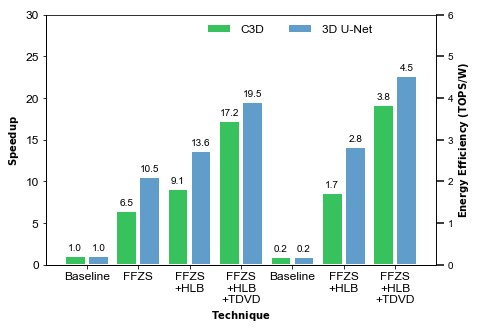

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import statistics
import datetime   
import sys
sys.path.append('../')

speedup_c3d = np.array([1, 6.48, 9.07,  17.2]) # 1 x6.48x 1.4x 1.9  = 17.2
power_factor = np.array([5.71, 4.6, 5.3, 4.5 ])
energy_efficiency_c3d = np.delete(speedup_c3d / power_factor, 1) # np.array([0.175   3.59])

# fig_name ='../../generate/technique_c3d.svg'

# # 3dunet
speedup_3dunet = np.array([1, 10.49, 13.64,  19.5]) # 1 x10.49x 1.3x 1.43  = 19.5
power_factor = np.array([5.71, 4.4, 4.82, 4.3 ])
energy_efficiency_3dunet = np.delete(speedup_3dunet / power_factor, 1) #0.175,..., 4.65

# energy_efficiency[1] = 0
fig_name ='../../generate/technique_c3d.svg'

y1_value_multi = [np.pad(speedup_c3d,(0,3),'constant',constant_values=(0,0)), np.pad(speedup_3dunet,(0,3),'constant',constant_values=(0,0))]
y2_value_multi = [np.pad(energy_efficiency_c3d[0:3],(4,0),'constant',constant_values=(0,0)), np.pad(energy_efficiency_3dunet[0:3],(4,0),'constant',constant_values=(0,0))]
# x1_value = 
y1_legend_multi = ['C3D', '3D U-Net']
y2_legend_multi = ['C3D', '3D U-Net']
# y2_legend_multi = ['Energy-Efficiency', 'Energy-Efficiency']
xlabel = r"$\bf{Technique}$"
y1_label = r"$\bf{Speedup}$"
y2_label = r"$\bf{Energy\ Efficiency\ (TOPS/W)}$"
# fig_name = os.path.join('../generate', 'tdvd.csv')
y1_yticks_max = 30
y1_yticks_min = 0
y2_yticks_max = 6
y2_yticks_min = 0
len_yticks = 7
print(y1_value_multi)
print(y2_value_multi)
xticks = ['Baseline', 'FFZS', 'FFZS\n+HLB', 'FFZS\n+HLB\n+TDVD',
'Baseline', 'FFZS\n+HLB', 'FFZS\n+HLB\n+TDVD']
x_value = [1, 2, 3, 4, 5, 6, 7]
figsize = [7, 4.6]
legend_loc = [0.4, 0.9]
from cls_plt_fig import cls_plt_fig
cls_plt_fig('').func_plt_fig({   "x_name":"Conv Layers", 
            "x_value": np.array(x_value), 
            "x_label" : xlabel,
            "y1_fig_type": "bar",
            "y1_name":y1_legend_multi,
            "y1_value":y1_value_multi, 
            "y1_color":[(56/255,194/255,93/255), (96/255,157/255,202/255)],
            "y1_linestyle":'x-',
            "y1_label":y1_label,
            # "y1_marker":y_marker_multi,
            "y1_markerfacecolor":"white",
            "y1_markeredgewidth": 1,
            "y1_legend": y1_legend_multi,
            "y1_yticks_max":y1_yticks_max,
            "y1_yticks_min":y1_yticks_min,
            "y1_axis_color": (0,0,0),
            "y1_edgecolor": [(1,1,1), (1,1,1)],
            # "y1_hatch": ['///','/'],
            "y1_facecolor": [(56/255,194/255,93/255), (96/255,157/255,202/255)],

            "y2_fig_type": 'bar',
            "y2_name":y2_legend_multi,
            "y2_value":y2_value_multi, 
            "y2_color":[(96/255,157/255,202/255), (96/255,157/255,202/255)],
            "y2_linestyle":'x-',
            "y2_label":y2_label,
            # "y2_marker":y_marker_multi,
            "y2_markerfacecolor":"white",
            "y2_markeredgewidth": 1,
            "y2_legend": y2_legend_multi,
            "y2_legend_off": True,
            "y2_yticks_max":y2_yticks_max,
            "y2_yticks_min":y2_yticks_min,
            "y2_axis_color": (0,0,0),
            "y2_edgecolor": [(1,1,1), (1,1,1)],
            # "y2_hatch": ['///','/'],
            "y2_facecolor": [(56/255,194/255,93/255), (96/255,157/255,202/255)],


            "len_yticks": len_yticks,
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": 0.4,
            "bar_gap_width": 0.1,
            "xticks": xticks,
            'xticks_fontsize': 12,
            # "plt_text": False,
            "legend_loc": legend_loc,
            "legend_size": 12,
            "legend_ncol": 2,
            "plt_text": False,
            'figsize':figsize,
            "fig_name" :fig_name
})

In [ ]:
sparsity = [0, 33, 40, 60, 74, 85, 97]
energy = [0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832]
speedup = [0.175, 0.268, 0.313, 0.466, 1.157, 2.703, 5.832] / 0.175
fig_name = '../../generate/sparsity_driven_EE&speedup.svg'



# power = [0.2108, 0.2125, 0.2130, 0.2157, 0.2254, 0.228, 0.230]
#plt.figure(figsize=(4,4))
color = (255/255, 0, 0)
# plt.figure(figsize =(3.4,2.5), dpi = 200 )
plt.plot(sparsity, energy, 'x-', marker='s', color=color,  linewidth=2, markersize=8, label='energy efficiency')

from numpy import polyfit, poly1d
coeff = polyfit(sparsity, energy, 4)
print(coeff)
f = poly1d(coeff)
# plt.plot(sparsity, f(sparsity), 'k-')
print(f(82))
# plt.plot(fetch_sparsity, fetch_energy, 'r*')
plt.xlabel('In-slice Sparsity (%)', size=12)
plt.ylabel('Energy Efficiency (TOPS/W)', size=12)
plt.grid(True)

plt.show()

In [ ]:
threshold = range(0, 21, 2)
accuracy_loss= 0.970-np.array([
[0.9649305,
0.9637301,
0.9628994,
0.9628505,
0.9625254,
0.9624787,
0.9615566,
0.9631267,
0.9647457,
0.9621558,
0.9634964],

[0.9649305,
0.9633116,
0.9632202,
0.9636855,
0.9621069,
0.9638215,
0.9641466,
0.9628505,
0.9473045,
0.9402662,
0.9314263], # 

[0.9649305,
0.9648838,
0.9589603,
0.9592429,
0.9526735,
0.9370360,
0.9234340,
0.8984014,
0.8763880,
0.8168425,
0.7829756]
])
from matplotlib import colors
cdict = {'red':   ((0.0,  0.0, 0.0),
                   (0.5,  0.5, 0.5),
                   (1.0,  1, 1.0)),

         'green': ((0.0,  0, 0.0),
                   (0.5,  1, 1),
                   (1.0,  0, 0.0)),

         'blue':  ((0.0,  1, 1),
                   (0.5,  0.5, 0.5),
                   (1.0,  0, 0))}
cmap = colors.LinearSegmentedColormap('custom', cdict)
y1_legend = ['Conv1', 'Conv2', 'Conv3']
# y1_marker = ['s', '^', 'o', 'p','*', 'D', '+', '4']
y1_marker = ['s', 'o', '^']
# y1_color=[]
# for i in range(8):
#     y1_color.append( cmap(0.5*i) )
y1_color = [(0/255, 153/255, 255/255), (99/255, 255/255, 100/255), (255/255, 100/255, 100/255)]
y1_yticks_max = 0.1
fig_name = '../../generate/sensitivity.svg'
print(threshold)
print(y1_color)


cls_plt_fig('').func_plt_fig({   "x_name":"Conv Layers", 
            "x_value": threshold, 
            "x_label" : r"$\bf{Threshold}$",
            "y1_fig_type": "plot",
            "y1_name":y1_legend,
            "y1_value":accuracy_loss, 
            "y1_color":y1_color,
            "y1_linestyle":'x-',
            "y1_label":r"$\bf{Accuracy}$" + ' '+ r"$\bf{Loss}$",
            "y1_marker":y1_marker,
            "y1_markerfacecolor": "white",
            "y1_markeredgewidth": 2,
            "y1_legend": y1_legend,
            "y1_yticks_max":y1_yticks_max,
            "y1_axis_color": (0, 0, 0),
            "linewidth": 2,
            "markersize": 8,
            "family":"Arial",
            "label_size": 10,
            "bar_width": 0.4,
            "xticks": threshold,
            'xticks_fontsize': 10,
            # "plt_text": False,
            "legend_loc": (0.03, 0.65),
            'figsize':(7, 3),
            "fig_name" :fig_name,
            'y1_yticks_max': 0.2
})

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# top-level
fig_name = 'top'
startangle = 20
area = np.array([12885986,129255, 2196810,
327901,
1154988,
141859
])

labels = ['PE array\n{:.1f}% '.format(area[0]/sum(area)*100), 'top-level control {:.1f}%'.format(area[1]/sum(area)*100), 'global buffer {:.1f}%'.format(area[2]/sum(area)*100), 'pool & ReLU {:.1f}%'.format(area[3]/sum(area)*100), 'other {:.1f}%'.format(area[4]/sum(area)*100), 'interface {:.1f}%'.format(area[5]/sum(area)*100)]
# colors = [(128/255, 216/255, 248/255), (99/255, 224/255, 196/255), (253/255, 160/255, 103/255), (238/255, 234/255, 204/255), (255/255, 177/255, 177/255), (191/255, 191/255, 191/255)]

# intra-PE
# fig_name = 'intra-PE'
# startangle= 20
# area = np.array([
# 139604,
# 131362,
# 234684,
# 16977,
# 165240,
# 97781
# ])

# labels = ['activation buffer   \n{:.1f}   % '.format(area[0]/sum(area)*100), 'weight buffer {:.1f}%'.format(area[2]/sum(area)*100), 'psum buffer {:.1f}%'.format(area[1]/sum(area)*100), 'scheduler {:.1f}%'.format(area[3]/sum(area)*100), 'MAC {:.1f}%'.format(area[5]/sum(area)*100), 'PE control {:.1f}%'.format(area[4]/sum(area)*100)]


colors = [(0/255, 153/255, 255/255), (67/255, 230/255, 184/255), (253/255, 160/255, 103/255), (238/255, 234/255, 204/255), (255/255, 100/255, 100/255), (191/255, 191/255, 191/255)]

# colors = [(0/255, 153/255, 255/255), (215/255, 227/255, 191/255), (255/255, 242/255, 204/255), (183/255, 221/255, 232/255), (238/255, 234/255, 242/255), (191/255, 191/255, 191/255)]



# plt.rcParams["font.family"] = ["Arial"]
plt.subplots(figsize=(4, 4.6))
data = {"PE": 120, "电子": 90, "计算机": 50, "经管": 60, "建筑": 100, "汽车": 50}
# 构造数据
data = pd.DataFrame([data])
# 绘制圆环图，并返回饼块对象
wedges, texts = plt.pie(area, colors=colors, startangle=startangle, radius=1.5, wedgeprops={'linewidth': 3, 'edgecolor': "white"})
# 构造annotate函数的**kwargs参数，设置引导线线型
kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
# 遍历饼块绘制注释标签和引导线
for i, p in enumerate(wedges):
    # 根据matplotlib.patches.Wedge对象的theta1和theta2参数计算饼块均分点的角度
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    # 根据角度的弧度计算 饼块均分点的坐标（引导线的起点）
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    # print(p.theta1, p.theta2, ang, np.deg2rad(ang), x, y)
    # 演示引导线起点位置
    # plt.plot(x, y, "or")
    # 根据x的值即角度所在象限确定引导线的对齐方式
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    # 设置引导线的连接方式
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # 绘制注释标签和引导线
    if i >0:
        plt.annotate(
            labels[i],
            xy=(x, y),
            xytext=(1.8 * np.sign(x), 2 * y),
            horizontalalignment=horizontalalignment,fontsize=30,
            **kw
        )
    else:
        plt.annotate(
            labels[i],
            xy=(x, y),
            xytext=(1.8* np.sign(x), 1.8* y),
            # xytext=(2* x, 4* y),
            horizontalalignment=horizontalalignment,fontsize=30,
            **kw
        )
# plt.title("专业人数占比")
wedges[0].set_hatch('//')
wedges[1].set_hatch('+')
wedges[2].set_hatch('/')
wedges[4].set_hatch('++')
wedges[5].set_hatch('.')
plt.savefig('../../generate/area_'+fig_name+'.svg', format='svg')
plt.show()


20.0 83.96941363811493 51.984706819057465 0.9073042946765009 0.6158717863543894 0.7878463954176939
83.96941363811493 144.1621696949005 114.06579166650772 1.9908236284744696 -0.40778538176926854 0.9130778074267778
144.1621696949005 251.69918179512024 197.93067574501038 3.4545419824477115 -0.9514297109971034 -0.30786605046995397
251.69918179512024 259.4783905893564 255.58878619223833 4.4608658502303795 -0.24887945143098247 -0.9685344695236269
259.4783905893564 335.19474245607853 297.3365665227175 5.189502072396567 0.45921658208298355 -0.8883243387074466
335.19474245607853 379.99999798834324 357.5973702222109 6.241251506850706 0.9991209070259343 -0.041921511705500354


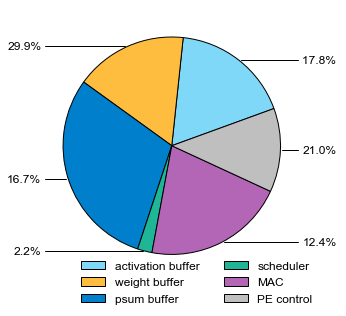

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fontsize = 12
radius = 1
# top-level
# loc_legend = (0.15,-0.1)
# legend = ['PE array', 'top-level contro', 'global buffer', 'pool & ReLU', 'other', 'interface']
# fig_name = 'top'
# startangle = 40
# area = np.array([12885986,129255, 2196810,
# 327901,
# 1154988,
# 141859
# ])

labels = ['{:.1f}% '.format(area[0]/sum(area)*100), '{:.1f}%'.format(area[1]/sum(area)*100), '{:.1f}%'.format(area[2]/sum(area)*100), '{:.1f}%'.format(area[3]/sum(area)*100), '{:.1f}%'.format(area[4]/sum(area)*100), '{:.1f}%'.format(area[5]/sum(area)*100)]
colors = [(128/255, 216/255, 248/255), (1, 189/255, 63/255), (0,128/255, 204/255), (30/255, 182/255, 150/255), (180/255,102/255, 182/255), (191/255, 191/255, 191/255)]

# intra-PE
loc_legend = (0.15,-0.1)
legend = ['activation buffer', 'weight buffer', 'psum buffer', 'scheduler', 'MAC', 'PE control']
fig_name = 'intra-PE'
startangle= 20
area = np.array([
139604,
131362,
234684,
16977,
165240,
97781
])

labels = ['{:.1f}% '.format(area[0]/sum(area)*100), '{:.1f}%'.format(area[2]/sum(area)*100), '{:.1f}%'.format(area[1]/sum(area)*100), '{:.1f}%'.format(area[3]/sum(area)*100), '{:.1f}%'.format(area[5]/sum(area)*100), '{:.1f}%'.format(area[4]/sum(area)*100)]


# colors = [(0/255,173/255,186/255), (67/255, 230/255, 184/255), (253/255, 160/255, 103/255), (238/255, 234/255, 204/255), (255/255, 100/255, 100/255), (191/255, 191/255, 191/255)]

# colors = [(0/255, 153/255, 255/255), (215/255, 227/255, 191/255), (255/255, 242/255, 204/255), (183/255, 221/255, 232/255), (238/255, 234/255, 242/255), (191/255, 191/255, 191/255)]



# plt.rcParams["font.family"] = ["Arial"]
plt.subplots(figsize=(5, 5))
data = {"PE": 120, "电子": 90, "计算机": 50, "经管": 60, "建筑": 100, "汽车": 50}
# 构造数据
data = pd.DataFrame([data])
# 绘制圆环图，并返回饼块对象
wedges, texts = plt.pie(area, colors=colors, startangle=startangle, radius=radius, wedgeprops={'linewidth': 1, 'edgecolor': "white"})
# 构造annotate函数的**kwargs参数，设置引导线线型
kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
# wedges[0].set_hatch('//')
# wedges[1].set_hatch('+')
# wedges[2].set_hatch('/')
# wedges[4].set_hatch('++')
# wedges[5].set_hatch('.')
# 遍历饼块绘制注释标签和引导线
for i, p in enumerate(wedges):
    # 根据matplotlib.patches.Wedge对象的theta1和theta2参数计算饼块均分点的角度
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    # 根据角度的弧度计算 饼块均分点的坐标（引导线的起点）
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    print(p.theta1, p.theta2, ang, np.deg2rad(ang), x, y)
    # 演示引导线起点位置
    # plt.plot(radius*x, radius*y, "ob", markersize = 1)
    # 根据x的值即角度所在象限确定引导线的对齐方式
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    # 设置引导线的连接方式
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # 绘制注释标签和引导线

    # if i >0:
    plt.annotate(
        labels[i],
        xy=(radius*x, radius*y),
        xytext=(radius* np.sign(x)*1.2, y),
        horizontalalignment=horizontalalignment,fontsize=fontsize,
        **kw
    )
    # else:
    #     plt.annotate(
    #         labels[i],
    #         xy=(x, y),
    #         xytext=(1.8* np.sign(x), 1.5* y),
    #         # xytext=(2* x, 4* y),
    #         horizontalalignment=horizontalalignment,fontsize=fontsize,
    #         **kw
    #     )

# plt.title("专业人数占比")


plt.legend(wedges, legend, loc=loc_legend, ncol=2, fontsize=fontsize, frameon=False)
plt.savefig('../../generate/area_'+fig_name+'.svg', format='svg')
plt.show()


******** test import 
color: [(0.0, 0.6784313725490196, 0.7294117647058823), (0.0, 0.6784313725490196, 0.7294117647058823)]
idx_y: 0
idx_y: 1
[<matplotlib.lines.Line2D object at 0x7fb2ae961518>, <matplotlib.lines.Line2D object at 0x7fb3832a1400>] ['Accuracy/Score', 'Accuracy/Score']


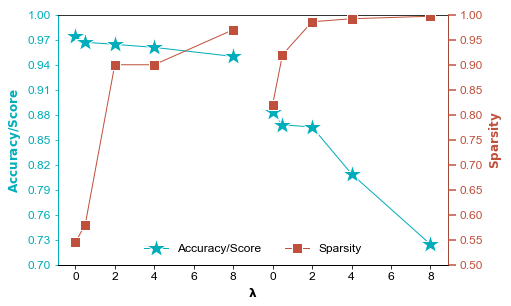

In [6]:



# C3D
# axis_y = [0.967114, 0.967, 0.964492, 0.960856, 0.949976]
# sparsity = [0.64, 0.89, 0.90, 0.96, 0.97]
# lable_2 = 'Accuracy'
# label_data = ["(0, 0, 0, 0, 0, 0, 0, 0)",
#               "(3, 3, 3, 3, 3, 3, 3, 3)",
#               "(7, 2, 3, 2, 3, 3, 4, 4)",
#               "(10, 7, 5, 5, 5, 5, 5, 2)",
#               "(17, 9, 5, 5, 6, 6, 6, 5)"
#             ]
# y1_legend = ['Accuracy']
# y1_label = r"$\bf{Accuracy}$"
# y1_value = np.array([[0.9745, 0.967, 0.964492, 0.960856, 0.949976]]) # score
# y2_value = np.array([0.545, 0.58, 0.90, 0.9, 0.97]) # sparsity
# y1_yticks_min = 0.9
# legend_loc = (0.05, 0.85)
# fig_name = '../../generate/lambda_c3d.svg'

# 3D Unet
# y1_legend = ['Score']
# y1_label = r"$\bf{Score}$"
# y1_value = np.array([[0.8836, 0.8678476, 0.8654427, 0.8090884, 0.7245791]]) # score
# y2_value = np.array([0.82, 0.92, 0.986, 0.992, 0.997]) # sparsity
# y1_yticks_min = 0.5
# legend_loc = (0.6, 0.7)
# fig_name = '../../generate/lambda_3dunet.svg'


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from cls_plt_fig import cls_plt_fig


x_label = r"$\bf{\lambda}$"
x_value = np.array([0, 0.5, 2, 4, 8]) #, 10, 10.5, 12, 14, 18]) # lambda
# x_ticks = np.array([0, 0.5, 2, 4, 8, 0, 0.5, 2, 4, 8])
y1_label = r"$\bf{Accuracy/Score}$"
y1_legend = ['Accuracy/Score','Accuracy/Score']
y1_value = np.array([[0.9745, 0.967, 0.964492, 0.960856, 0.949976], [ 0.8836, 0.8678476, 0.8654427, 0.8090884, 0.7245791]]) # score
y1_marker = ['*', '*']
y2_marker = ['s', 's']
y2_label = r"$\bf{Sparsity}$"
y2_legend = ['Sparsity','Sparsity']
y2_value = np.array([[0.545, 0.58, 0.90, 0.9, 0.97], [0.82, 0.92, 0.986, 0.992, 0.997]])
fig_name = '../../generate/lambda.svg'
legend_loc = 'lower center'
y1_yticks_min = 0.7

x_axis = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
x_ticks = [0, 2, 4, 6, 8, 0, 2, 4, 6, 8]

# cls_plt_fig('').func_plt_fig({   "x_name":"Lambda", 
#             "x_value": x_value, 
#             "x_label" : x_label,
#             "y1_fig_type": "plot",
#             "y1_name":y1_legend,
#             "y1_value":y1_value, 
#             "y1_color":y1_color, # 
#             "y1_linestyle":'x-',
#             "y1_label":y1_label,
#             "y1_marker":'s',
#             "y1_legend": y1_legend,
#             "y1_yticks_max": 1,
#             # "y2_fig_type": "plot",
#             # "y2_name":"Sparsity",
#             # "y2_value":y2_value,
#             # "y2_color":(1, 0, 0),
#             # "y2_linestyle":'--',
#             # "y2_label":y2_label,
#             # "y2_marker":'^',
#             # "y2_legend": 'Sparsity',
#             # "y2_yticks_max": 1,
#             "linewidth": 2,
#             "markersize": 8,
#             "family":"Arial",
#             "label_size": 10,
#             "legend_loc": (0.01, 0.8),
#             "grid_axis": 'x',
#             "bar_width": 0.01,
#             # "xticks": False,
#             "figsize" : (3.5, 4.6),
#             "fig_name" : fig_name
# })

y1_color = [(75/255, 172/255, 198/255), (75/255, 172/255, 198/255)]
y2_color = [(192/255, 80/255, 60/255), (192/255, 80/255, 60/255)]
y1_axis_color = y1_color[0]#(75/255, 172/255, 198/255)
y2_axis_color = y2_color[0]#(192/255, 80/255, 60/255)
cls_plt_fig('').func_plt_fig({   "x_name":"Conv Layers", 
            "x_value": x_value, 
            "x_label" : x_label,
            "y1_fig_type": "plot",
            "y1_name":y1_legend,
            "y1_value":y1_value, 
            "y1_color":y1_color,
            "y1_linestyle":'-',
            "y1_label":y1_label,
            "y1_marker":y1_marker,
            "y1_markerfacecolor": y1_axis_color,
            "y1_markeredgecolor": "white",
            "y1_markeredgewidth": 1,
            "y1_legend": y1_legend,
            "y1_yticks_max":1,
            "y1_yticks_min":y1_yticks_min,
            "y1_axis_color": y1_axis_color,
            
            "y2_fig_type": "plot",
            "y2_name":y2_legend,
            "y2_value":y2_value,
            "y2_color":y2_color,
            "y2_linestyle":'-',
            "y2_label":y2_label,
            "y2_marker":y2_marker,
            "y2_markerfacecolor": y2_axis_color,
            "y2_markeredgecolor": "white",
            "y2_markeredgewidth": 1,
            "y2_legend": y2_legend,
            "y2_yticks_max": 1,
            "y2_yticks_min": 0.5,
            "y2_axis_color": y2_axis_color,

            "len_yticks": 11,
            "linewidth": 1,
            "markersize": 10,
            "family":"Arial",
            # "label_size": 10,
            "bar_width": 0.4,
            "xticks": x_ticks,
            'xticks_fontsize': 10,
            # "plt_text": False,
            # "grid":'y',
            "legend_loc": legend_loc,
            "legend_ncol":2,
            # "legend_ncol": 12,
                        "legend_size": 12,
            "label_size": 12,
            "xticks_fontsize": 12,
            # "y2_legend_off": True,
            'figsize':(7, 4.6),
            "fig_name" :fig_name,
            "x_axis": x_axis
            # 
})